In [1]:
# import autograd functionalities
import autograd.numpy as np
from autograd import grad as compute_grad   

# import plotting library and other necessities
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import general libraries
import copy
from datetime import datetime 

# import custom 
import normalizers
from early_stop_lib import superlearn_setup as earlystop_setup

#this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

import sys
sys.path.append('../../')

%load_ext autoreload
%autoreload 2

# MNIST

In [37]:
# This code cell will not be shown in the HTML version of this notebook
# load data
from sklearn.datasets import fetch_mldata
MNIST = fetch_mldata('MNIST original')
x = MNIST.data.astype('float64')
y = np.reshape(MNIST.target, (-1, 1))
ind = np.random.permutation(len(y))

# take a random subset of full dataset
P = 7000
x = x[ind[:P],:].T
y = y[ind[:P]].T

# contrast normalization
normalizer,inverse_normalizer = normalizers.standard(x.T)
x = normalizer(x.T).T

<IPython.core.display.Javascript object>


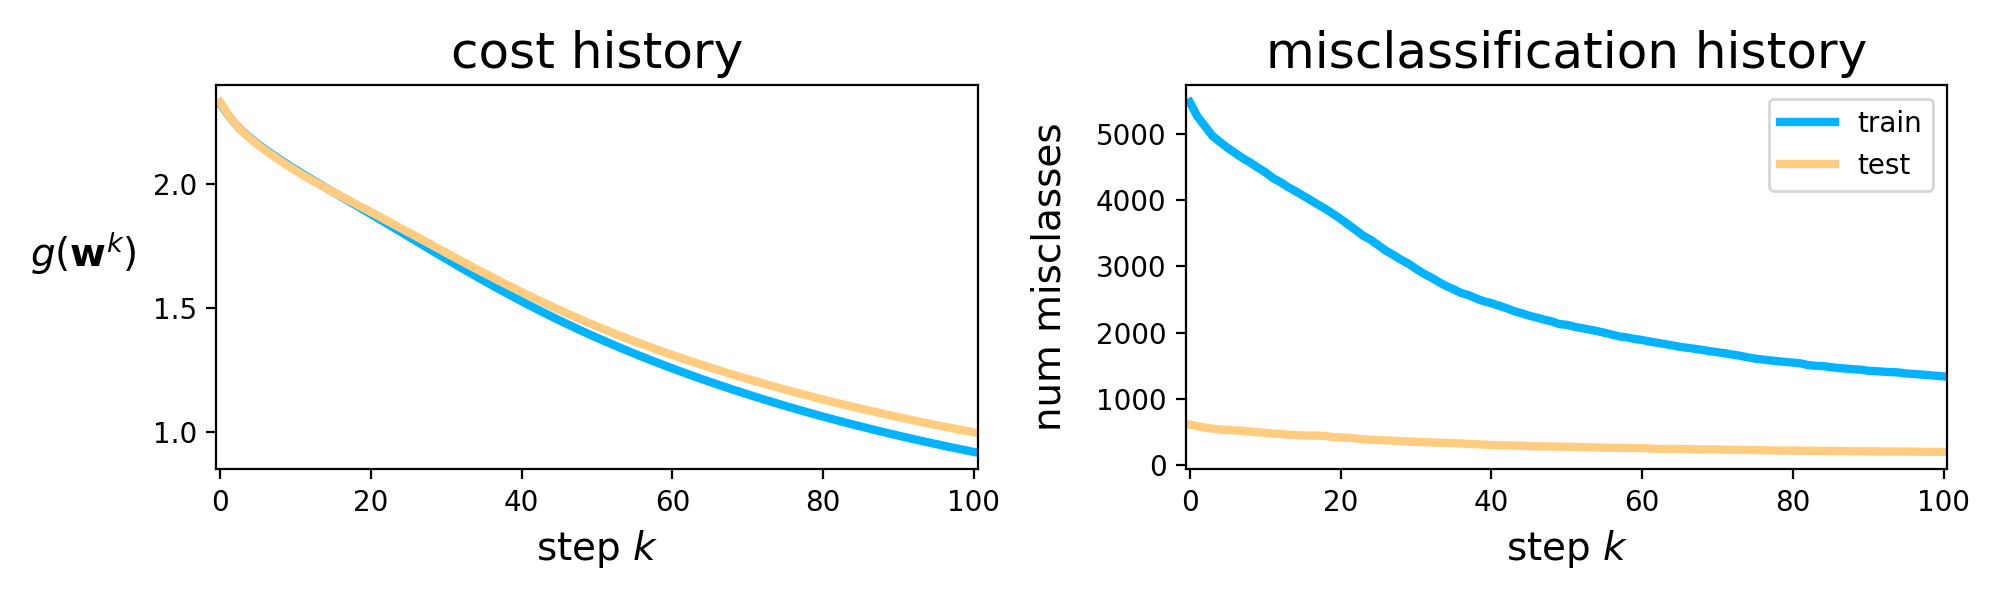

In [38]:
## This code cell will not be shown in the HTML version of this notebook
# import the v1 library
mylib4 = earlystop_setup.Setup(x,y)

# choose features
layer_sizes = [x.shape[0],10,10]

# choose features
mylib4.choose_features(name = 'multilayer_perceptron_batch_normalized',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib4.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib4.make_train_test_split(train_portion = 0.9)

# choose cost
mylib4.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib4.fit(max_its = 100,alpha_choice = 10**(-1))

# plot cost history
mylib4.show_histories(start = 0)

In [39]:
np.min(mylib4.test_count_histories[0])

203.0